In [27]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image

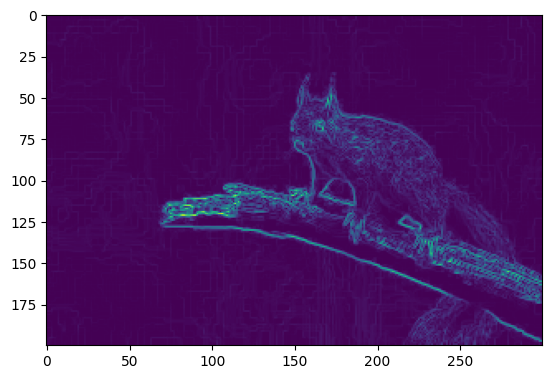

In [40]:
# Toán tử roberts

IMG_PATH='../../images/chuong_5/robert.webp'

roberts_cross_v = np.array([[1, 0 ],[0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ],[ -1, 0 ]] )

img = cv2.imread(IMG_PATH,0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
# cv2.imwrite("../../images/chuong_5/output.jpg",edged_img)
plt.imshow(edged_img)
plt.show()


In [43]:
# Toán tử sobel

IMG_PATH='../../images/chuong_5/coin.webp'

img = cv2.imread(IMG_PATH)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
# edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# # Display Canny Edge Detection Image
# cv2.imshow('Canny Edge Detection', edges)
# cv2.waitKey(0)

cv2.destroyAllWindows()

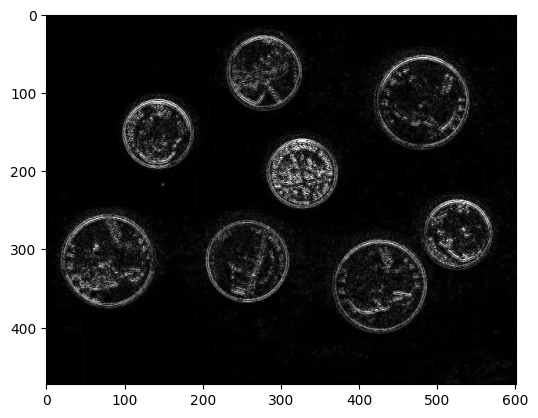

In [38]:
# Toán tử laplace
IMG_PATH='../../images/chuong_5/coin.webp'

def laplace_operator():
  # Declare the variables we are going to use
  ddepth = cv2.CV_16S
  kernel_size = 3

  src = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR) # Load an image

  # Remove noise by blurring with a Gaussian filter
  src = cv2.GaussianBlur(src, (3, 3), 0)

  # Convert the image to grayscale
  src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  # Create Window
  # cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
  # Apply Laplace function
  dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
  # converting back to uint8
  abs_dst = cv2.convertScaleAbs(dst)

  new_img=cv2.cvtColor(abs_dst, cv2.COLOR_BGR2RGB)

  plt.imshow(new_img)
  plt.show()

laplace_operator()

In [34]:
# Toán tử prewitt
IMG_PATH='../../images/chuong_5/coin.webp'

def prewitt_operator():
  img = cv2.imread(IMG_PATH)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

  kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
  img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

  cv2.imshow("Prewitt X", img_prewittx)
  cv2.imshow("Prewitt Y", img_prewitty)
  cv2.imshow("Prewitt", img_prewittx + img_prewitty)

  cv2.waitKey(0)
  cv2.destroyAllWindows()

prewitt_operator()

In [35]:
# Thuật toán canny
IMG_PATH='../../images/chuong_5/coin.webp'

def canny_operator():
  img = cv2.imread(IMG_PATH)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

  img_canny = cv2.Canny(img,100,200)

  cv2.imshow("Canny", img_canny)

  cv2.waitKey(0)
  cv2.destroyAllWindows()

canny_operator()

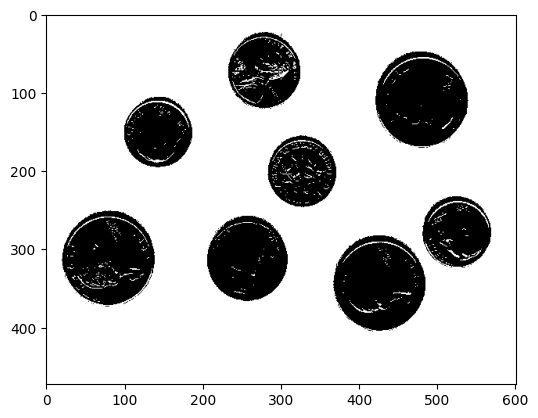

In [37]:
# Thuật toán otsu

IMG_PATH='../../images/chuong_5/coin.webp'

def otsu_algo():
  img = cv2.imread(IMG_PATH)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # thresholding
  ret, thres = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  new_img=cv2.cvtColor(thres, cv2.COLOR_BGR2RGB)

  plt.imshow(new_img)
  plt.show()

otsu_algo()